In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Yousuf\AppData\Local\Temp\ipykernel_15540\4285861871.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_type_counts.index, y=job_type_counts.values, palette='viridis')


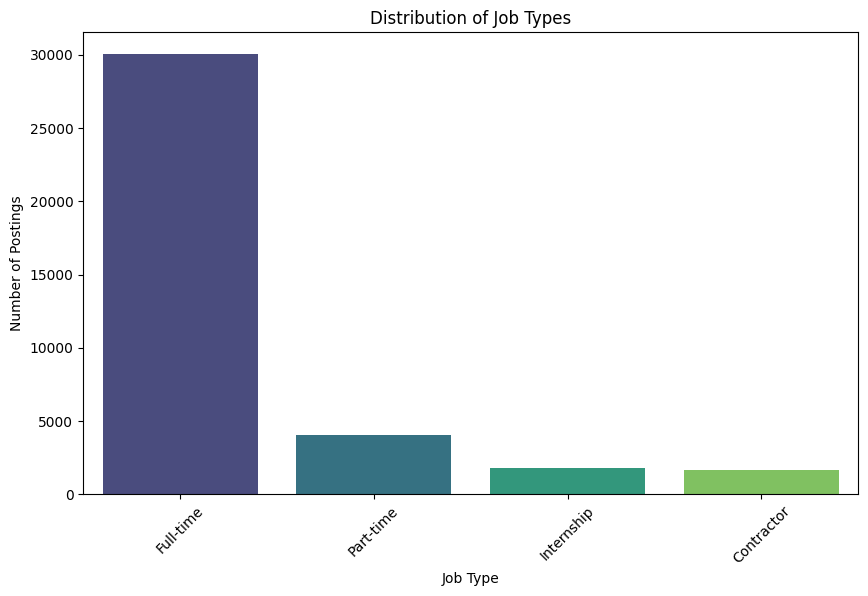

In [1]:
# Load the job listings dataset (adjust path as needed)
job_df = pd.read_csv("C:\\Yousuf\\DEPI\\Technical\\Mega Projects\\Job_Recommendation_System\\data\\Raw\\Jobs.csv")

# Distribution of Job Types
job_type_counts = job_df['Job-Type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=job_type_counts.index, y=job_type_counts.values, palette='viridis')
plt.title('Distribution of Job Types')
plt.xlabel('Job Type')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45)
plt.show()

C:\Users\Yousuf\AppData\Local\Temp\ipykernel_15540\2312522941.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette='magma')


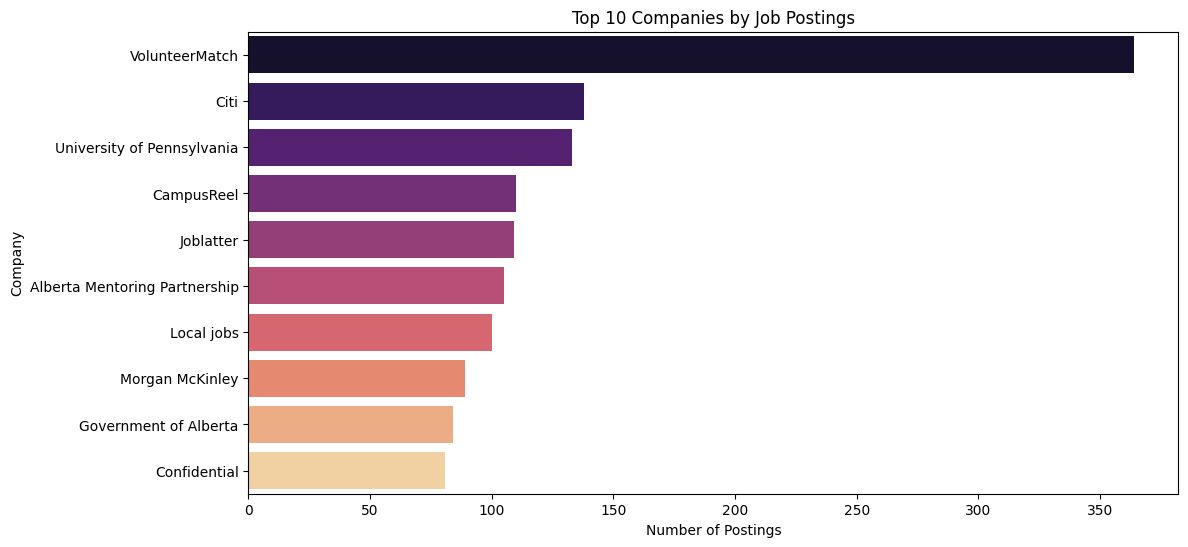

In [2]:
# Top Companies by Number of Job Postings
top_companies = job_df['Company'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='magma')
plt.title('Top 10 Companies by Job Postings')
plt.xlabel('Number of Postings')
plt.ylabel('Company')
plt.show()

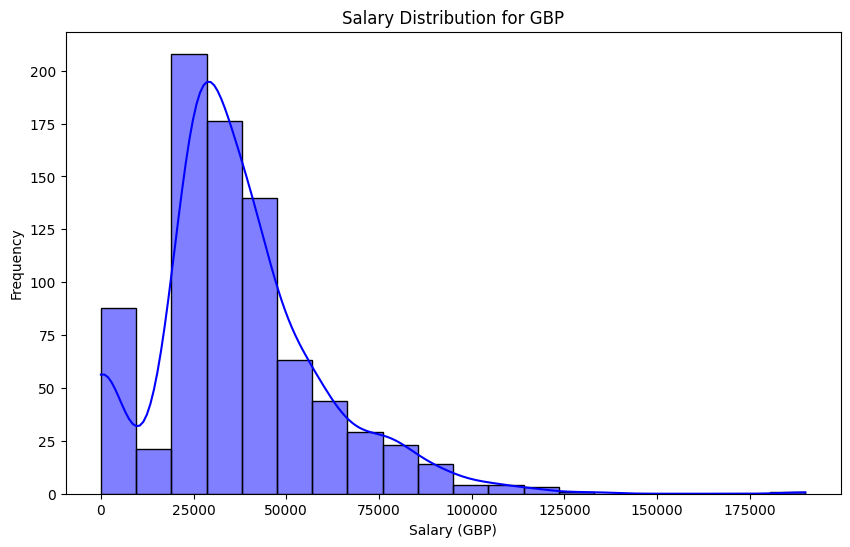

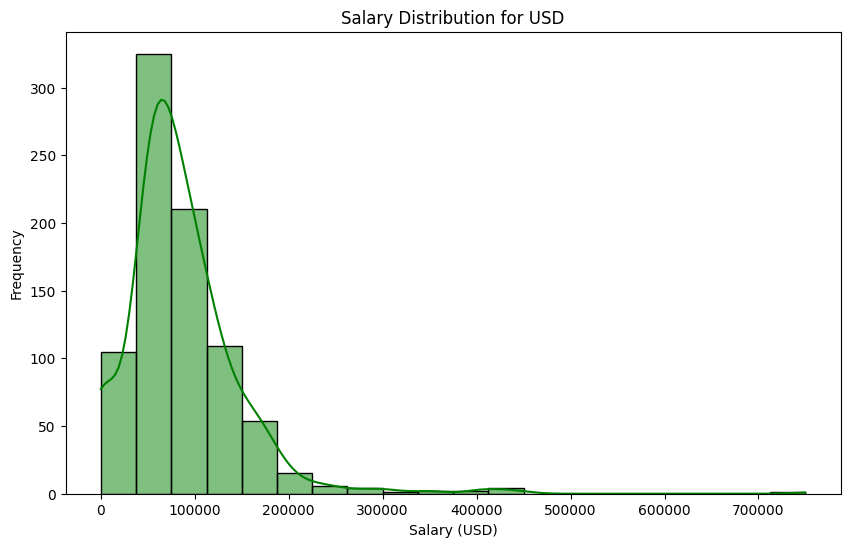

In [3]:
import re

# Function to parse salary strings
def parse_salary(salary_str):
    if pd.isna(salary_str):
        return None, None
    salary_str = salary_str.lower()
    if '£' in salary_str:
        currency = 'GBP'
    elif '$' in salary_str:
        currency = 'USD'
    else:
        return None, None
    numbers = [float(s) for s in re.findall(r'\d+\.?\d*', salary_str)]
    if 'k' in salary_str:
        numbers = [n * 1000 for n in numbers]
    if len(numbers) == 1:
        salary = numbers[0]
    elif len(numbers) == 2:
        salary = (numbers[0] + numbers[1]) / 2
    else:
        return None, None
    return currency, salary

# Apply parsing
job_df['Currency'], job_df['Parsed_Salary'] = zip(*job_df['Salary'].apply(parse_salary))

# Histogram for GBP
gbp_salaries = job_df[job_df['Currency'] == 'GBP']['Parsed_Salary'].dropna()
plt.figure(figsize=(10, 6))
sns.histplot(gbp_salaries, bins=20, kde=True, color='blue')
plt.title('Salary Distribution for GBP')
plt.xlabel('Salary (GBP)')
plt.ylabel('Frequency')
plt.show()

# Histogram for USD
usd_salaries = job_df[job_df['Currency'] == 'USD']['Parsed_Salary'].dropna()
plt.figure(figsize=(10, 6))
sns.histplot(usd_salaries, bins=20, kde=True, color='green')
plt.title('Salary Distribution for USD')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

C:\Users\Yousuf\AppData\Local\Temp\ipykernel_15540\3917017270.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='coolwarm')


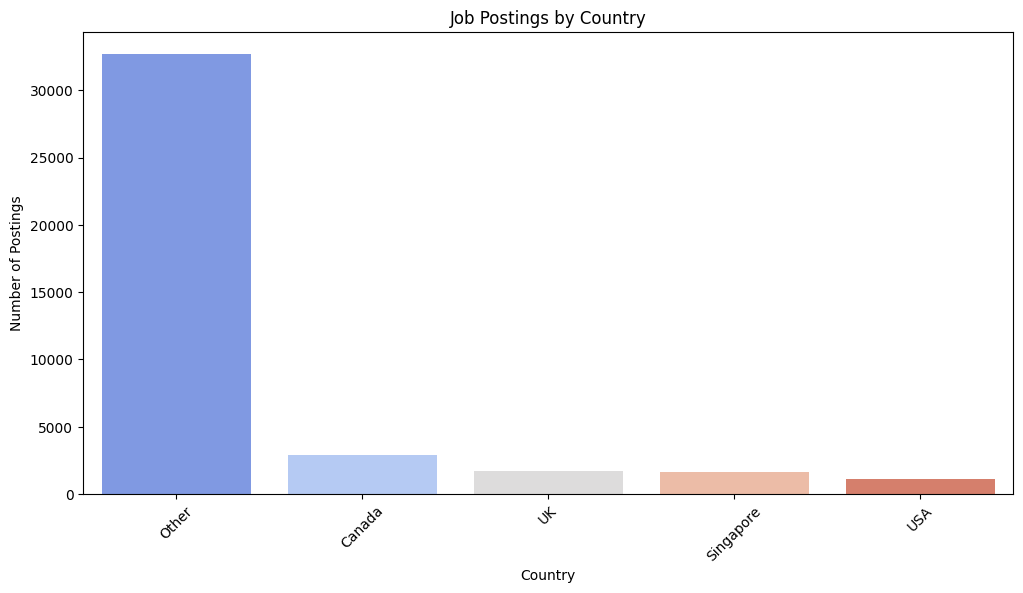

In [4]:
# Manual mapping of top locations to countries (example for top 5, extend as needed)
location_to_country = {
    'London, UK': 'UK',
    'Singapore': 'Singapore',
    'Toronto, ON': 'Canada',
    'Ottawa, ON': 'Canada',
    'New York, NY, USA': 'USA'
    # Add more mappings for top 20 from job_df['Location'].value_counts().head(20)
}
job_df['Country'] = job_df['Location'].apply(lambda x: location_to_country.get(x, 'Other'))

# Aggregate by country
country_counts = job_df['Country'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='coolwarm')
plt.title('Job Postings by Country')
plt.xlabel('Country')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45)
plt.show()